#Twitter Script

###Installing tweepy library.to interact with reddit API

In [8]:
pip install tweepy

### Adding python imports

In [9]:

import pandas as pd
import tweepy
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

### Downloading stopwords from NLTK. It has a list of words

In [10]:
# Download stopwords from nltk
nltk.download('stopwords')

# Initialize stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cleaning Tweet data and threads

In [11]:
# Function to clean tweets
def clean_tweet(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

### Retrieving Tweets and saving them in CSV files

In [12]:
consumer_key = 'pHiMRVNb4633JNTlARZrkW01y'
consumer_secret = 'dQBIGMhuwjuJh1crI5TKxQzeFeZx7FBm8wd6Cv7gNA1Uk1vdit'
access_token = '960593489347178499-Y4PnAnolCjo8ksEi8IYzof4pNT97Go2'
access_token_secret = 'qO58Ws0MFw5LyaW5esJaWZGWjjVBE5uragEnAwcYPiMHl'

# Authenticate to the Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
tweets_data = []



# Get recent tweets from a specific user
tweets = api.user_timeline(screen_name="RenewableIndia", count=200)

for tweet in tweets:
  # cleaning data
    cleaned_text = clean_tweet(tweet.text)
    print(f"{tweet.user.name} said {cleaned_text}")
    tweets_data.append({
        'name': tweet.user.name,
        'description': cleaned_text
    })

# Create DataFrame and save to CSV
posts_df = pd.DataFrame(tweets_data)
posts_df.to_csv('twitter_renewable_energy_india.csv', index=False)

# Keywords to track
energy_types = ['solar', 'wind', 'biomass', 'hydro']

# Count occurrences of energy types in cleaned tweets
energy_count = Counter()

for tweet in tweets_data:
    for energy in energy_types:
        if energy in tweet['description']:
            energy_count[energy] += 1

RenewableEnergyIndia said antaisolar lights renewable energy india rei 2024
RenewableEnergyIndia said renewables account nearly half indias total energy capacity october
RenewableEnergyIndia said extensive renewable energy collaboration foreseen
RenewableEnergyIndia said 
RenewableEnergyIndia said 
RenewableEnergyIndia said national electricity plan launched transmitting 500 gw renewable energy installed capacity 2030
RenewableEnergyIndia said india requires inr 285345 lakh cr investment 2047 achieve energy independence ireda cmd india need
RenewableEnergyIndia said gsecl leads gujarats renewable revolution
RenewableEnergyIndia said indias clean power industry finally making good
RenewableEnergyIndia said ibm acquires bengalurubased prescinto renewable energy asset management
RenewableEnergyIndia said renewable energy fraud collaboration way forward
RenewableEnergyIndia said india targets 500 gw renewable energy 2030 plans 915 lakh crore investment transmission
RenewableEnergyIndia sai

### Plotting them using Matplot

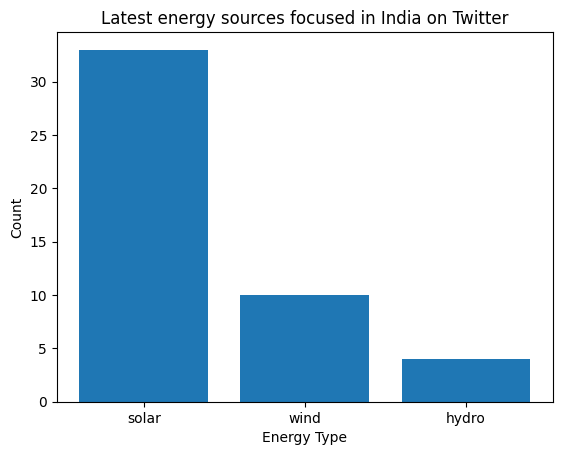

In [13]:

# Visualize the data
plt.bar(energy_count.keys(), energy_count.values())
plt.title('Latest energy sources focused in India on Twitter')
plt.xlabel('Energy Type')
plt.ylabel('Count')
plt.show()


### Generating HTML plotly files

In [14]:
import plotly.offline as pyo
import plotly.graph_objs as go

# Define a list of colors for each bar
colors = ['#FF5733', '#33FF57', '#3357FF', '#F5B041', '#8E44AD']  # Example colors

# Create data for the bar chart with different colors for each bar
data = [go.Bar(
    x=list(energy_count.keys()),  # Energy types as x-axis labels
    y=list(energy_count.values()),  # Count of occurrences as y-axis values
    marker=dict(color=colors)  # Assign different colors to each bar
)]

# Layout for the chart
layout = go.Layout(
    title='Latest energy sources focused in India on Twitter',
    xaxis=dict(title='Energy Type'),
    yaxis=dict(title='Count')
)

# Create a figure with the data and layout
fig = go.Figure(data=data, layout=layout)

# Export the chart as an HTML file
pyo.plot(fig, filename='energy_sources_chart_sg.html')



'energy_sources_chart_sg.html'